In [1]:
import numpy as np
from matplotlib.pyplot import plot, show, grid, xlabel, ylabel
from tqdm.notebook import tqdm 
import os
import sys


# Important directories
code_dir = os.path.dirname(os.getcwd())
module_dir = os.path.dirname(os.path.dirname(os.getcwd()))

# Allows to import my own module
sys.path.insert(0, code_dir)

from LongstaffSchwarz.model import BS

In [19]:
S = np.array([
            [1.00, 1.09, 1.08, 1.34],
            [1.00, 1.16, 1.26, 1.54],
            [1.00, 1.22, 1.07, 1.03],
            [1.00, 0.93, 0.97, 0.92],
            [1.00, 1.11, 1.56, 1.52],
            [1.00, 0.76, 0.77, 0.90],
            [1.00, 0.92, 0.84, 1.01],
            [1.00, 0.88, 1.22, 1.34]])
K = 1.1
r = 0.06
T = 3
sigma = 0.5

In [20]:
bs = BS(S, K, T, r, sigma, 'put')

In [21]:
N = 4
paths = 8
order = 2
bs.LSM(N,paths,order)

0.11443433004505696

In [25]:
S = 36
sigma = 0.2
T = 1
r = 0.06
K = 40
N = 50
paths = 100000


In [26]:
bs = BS(S, K, T, r, sigma, 'call')


In [27]:
bs.LSM(N, paths, order,True)

ValueError: invalid type. Set 'call' or 'put'

In [11]:
from LongstaffSchwarz.stochasticprocesses import FractionalBrownianMotion

def Plot(x):
    f = FractionalBrownianMotion(n=300, hurst=x, length=1)
    sample = np.ones((1000,301))
    for i in range(1000):
        fbm_sample = f.simulate()
        sample[i,:] = fbm_sample
    K = 0.
    r = 0.0
    T = 100.0
    sigma = 0.
    bs = BS(sample, K, T, r, sigma, 'put')
    tt = bs.LSM(301,1000,2,'bs')
    return tt

In [12]:
l = []
loop = tqdm(np.linspace(.2,0.99,10))
for i in loop:
    l.append(Plot(i))

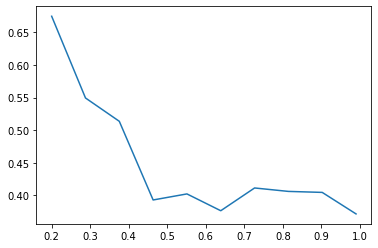

In [13]:
plot(np.linspace(.2,0.99,10),l)